

---


# Business Case - CDA - Cyclistic (4h)



---


## Contexte

Cyclistic est une entreprise de partage de vélos à Chicago, qui a depuis élargi son offre pour inclure une flotte de 5 824 vélos géolocalisés stationnés à 692 emplacements à travers Chicago.

Les vélos peuvent être déverrouillés à une station et retournés à n'importe quelle autre station du réseau à tout moment.

Les individus achetant des passes pour une seule course ou pour une journée complète sont considérés comme des cyclistes occasionnels, tandis que ceux qui acquièrent des abonnements annuels sont reconnus comme des membres de Cyclistic.



---


## Votre mission

Tu es un analyste de données junior travaillant dans l'équipe des analystes marketing chez Cyclistic.

Le directeur du marketing pense que le succès futur de l'entreprise dépend de l'augmentation du nombre d'abonnements annuels.

Par conséquent, ton équipe souhaite comprendre comment les cyclistes occasionnels et les membres annuels utilisent différemment les vélos Cyclistic.

À partir de ces informations, ton équipe élaborera une nouvelle stratégie marketing pour convertir les cyclistes occasionnels en membres annuels.

Mais avant cela, les dirigeants de Cyclistic doivent approuver tes recommandations, donc il est essentiel d'avoir des analyses de données convaincantes et des visualisations de données professionnelles.

l y a trois questions clés qui doivent être répondues à la fin de l'étude de cas :

* Comment les membres annuels et les cyclistes occasionnels utilisent-ils les vélos Cyclistic différemment ?
* Pourquoi les cyclistes occasionnels achèteraient-ils des abonnements annuels Cyclistic ?
* Comment Cyclistic peut-il utiliser les médias numériques pour influencer les cyclistes occasionnels à devenir membres ?
* Où recommenderas-tu à Cyclistic d'implémenter des nouvelles stations pour rendre le service plus disponible ?



---
##Phase 1 : Collecte, pré-traitement et traitement des données

Dans cette phase, tu dois comprendre le processus de génération et de collecte des données, ainsi que reconnaître les différents types, formats et structures de données pour une utilisation efficace dans l'analyse des données. De plus, tu dois veiller à respecter des pratiques éthiques en matière d'analyse de données et traiter les questions de biais et de crédibilité des données.

Vous allez dans un premier temps explorer le jeu de données, dans le but d'explorer plusieurs possibilités de choix. Une fois que votre choix est fait, lancez-vous dans l'élaboration de votre tableau de bord, dans le but de convaincre un maximum les investisseurs.

**Les données sont disponibles publiquement sur un serveur AWS (https://divvy-tripdata.s3.amazonaws.com/index.html)**

Tu as été chargés de travailler avec une année entière de données, **l'année 2021**, donc il faudra récupérer les fichiers (au format CSV) contenant des données de **Janvier 2021 à Décembre 2021, un fichier pour chaque mois**.

**Pensez à bien explorer les différents fichiers et de pouvoir réfélchir à travailler sur toute l'année. Il faudra aussi penser à éliminer tous les trajets qui causent des problèmes techniques en phase de pré-traitement. N'hésitez pas à ajouter des nouvelles colonnes afin de pouvoir mener à bien vos analyses et visualisations**.




---


## **IMPORTANT**

**P.S : PENSE A UTILISER LE FICHIER CSV CLEAN QUE TU AS PU GENERE A LA FIN DE LA PARTIE PANDAS AU LIEU DE RECOMMENCER LE TRAVAILE A 0. CA TE SERIVRA DE BONNE BASE POUR RAJOUTER QUE LES INFOS DONT T'AS BESOIN POUR CONTINUER LE BUSINESS CASE.**

**Tu peux aussi utiliser le code ci-dessous pour récupérer une bonne base de travail ou si tu n'as pas pu terminer la partie Pandas**

In [1]:
import pandas as pd

In [2]:
file_url = "https://storage.googleapis.com/dataset-storage-chicago-cyclist-csv/cyclistic_clean.csv"
chunk_size = 500000  # Nombre de lignes par chunk
chunks = pd.read_csv(file_url, chunksize=chunk_size)

df_list = []
for chunk in chunks: # Ex. filtrer les trajets avec distance > 0
    df_list.append(chunk)

df = pd.concat(df_list, ignore_index=True)
df.head()

,bike_type,user_type,start_time,end_time,day_of_week,day_type,month,season,start_station_name,end_station_name,route_type,start_lat,start_lng,end_lat,end_lng,distance_travelled_km,ride_duration_s,ride_duration_min
0,classic_bike,member,2021-01-24 19:15:38,2021-01-24 19:22:51,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,433.0,7.216667
1,electric_bike,member,2021-01-23 12:57:38,2021-01-23 13:02:10,Saturday,Weekend,January,Winter,California Ave & Cortez St,California Ave & North Ave,One-way trip,41.900406,-87.696733,41.910435,-87.696890,1.115287,272.0,4.533333
2,electric_bike,casual,2021-01-09 15:28:04,2021-01-09 15:37:51,Saturday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900374,-87.696688,41.899180,-87.672178,2.032911,587.0,9.783333
3,electric_bike,casual,2021-01-09 15:28:57,2021-01-09 15:37:54,Saturday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900379,-87.696716,41.899149,-87.672177,2.035544,537.0,8.950000
4,classic_bike,casual,2021-01-24 15:56:59,2021-01-24 16:07:08,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,609.0,10.150000


In [3]:
# Exemple d'importation d'un fichier depuis le servers AWS dédié

import requests
import zipfile
import io
import pandas as pd

# Step 1: Télécharger le fichier Zip
url = "https://divvy-tripdata.s3.amazonaws.com/202102-divvy-tripdata.zip"
response = requests.get(url)

# Step 2: Extraire le fichier Zip
with zipfile.ZipFile(io.BytesIO(response.content)) as the_zip:
    the_zip.extractall("divvy_data")

# Step 3: Lire le fichier CSV
csv_file_path = "divvy_data/202101-divvy-tripdata.csv"
df_janvier_2021 = pd.read_csv(csv_file_path)

# Afficher les 5 premières lignes du fichier csv Janvier 2021
df_janvier_2021.head()

FileNotFoundError: [Errno 2] No such file or directory: 'divvy_data/202101-divvy-tripdata.csv'

In [ ]:
df_janvier_2021

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96829,B1A5336E1412D8BF,classic_bike,2021-01-19 19:03:17,2021-01-19 20:10:03,Lake Shore Dr & Monroe St,13300,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.880958,-87.616743,41.984037,-87.652310,member
96830,57EA5CB7DCD75F90,classic_bike,2021-01-05 18:42:27,2021-01-05 19:33:33,Lake Shore Dr & Monroe St,13300,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.880958,-87.616743,41.984037,-87.652310,member
96831,815B319A078CC984,classic_bike,2021-01-07 17:59:47,2021-01-07 19:34:03,Lakefront Trail & Bryn Mawr Ave,KA1504000152,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.984037,-87.652310,41.984037,-87.652310,member
96832,6DB04151565CEE63,classic_bike,2021-01-06 19:20:31,2021-01-06 20:41:57,Lakefront Trail & Bryn Mawr Ave,KA1504000152,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.984037,-87.652310,41.984037,-87.652310,member




---

##Phase 2 : Analyses et visualisation des données

Pour mettre toutes les chances de votre côté et séduire les investisseurs, vous allez devoir faire les bons choix. Voici quelques questions pour vous guider:
- Quel est le pourcentage des types d'utilisateurs par rapport au total des utilisateurs ?
- Y a-t-il un type de vélo préféré par les différents types d'utilisateurs ?
- Quel type de vélo a la durée de trajet la plus longue entre les utilisateurs ?
- Quelle est la durée moyenne des trajets par type d'utilisateur ?
- Quelle est la distance moyenne parcourue par type d'utilisateur ?
- Quels jours sont les plus actifs pour les utilisateurs ?
- Quels mois ou quelles saisons de l'année les utilisateurs ont tendance à utiliser le service de partage de vélos ?
- Quel type d'utilisateur a le plus grand nombre de trajets aller-retour et de trajets aller simple effectués ?


---


## Phase 3 : Cartographie et recommendation d'implémentation physique

En plus de fournir une analyse complète qui vous permettra d'appuyer vos choix des recommendations à faire à l'entreprise, **prenez soin d'indiquer précisément où est meilleur de s'implanter.**

N'oubliez pas que les investisseurs, qui veulent bien placer leur argent, ne manqueront pas de soulever des points précis, pour s'assurer que votre activité soit rentable à coups sûr.  

**Dans le dataset, vous trouverez les coordonnées des stations de départ et d'arrivées.**

Comme dis plus haut, soyez créatif !   

Ne manquez pas d'étoffer vos arguments, et d'être étincelant le jour J ;)



---


## Livrables attendus

Les investisseurs souhaitent une présentation avec des slides (sous format pdf) et un tableau de bord intéractif (Power BI, Tableau ou autre outil de BI).

La présentation contiendra à minima ces éléments :
- Rappel du contexte et de la problématique
- Arguments
- Analyse exploratoire des données
- Méthodologie, outils et langages utilisés
- Votre tableau de bord contient des graphiques
- Votre tableau de bord contient au moins une visualisation de données interactive
- Votre tableau de bord contient au moins une carte représentant des informations géographiques
- Votre tableau de bord contient au moins un tableau croisé
- L'ensemble des graphiques et visuels doit être lisible par tous (prise en compte des personnes en situation de handicap visuel)
- Réponse aux questions métiers en conclusion :
  1. **Quelles sont les recommandations pour Cyclistic afin d'augmenter leur taux de clientèle, en se concentrant particulièrement sur le ciblage de leurs offres proposées et en exploitant les habitudes d'utilisation des clients ainsi que les préférences pour les vélos?**
  2. **Quel est le meilleur emplacement pour installer de nouvelles stations en se basant sur les habitudes d'utilisation des clients, les saisons et les stations les plus fréquentées ?**


Vous devrez faire **une présentation dans un premier temps sous slides**, qui contient au minimum **le contexte, la problématique, ainsi que la conclusion qui contient vos ARGUMENTS pour retenir l'attention des investisseurs. Aussi, vous utiliserez un dashboard pour convaincre les investisseurs, pour qu'ils puissent visualiser votre analyse et vos arguments.**

**Pour rappel, l'argumentation est l'élément central d'une présentation réalisée par un data analyst. En effet, à vous d'être convaincant, pour que vos arguments soient entendus. Il est donc nécessaire de développer un minimum d'expertise métier sur le sujet, pour être à l'aise.**

Les investisseurs ne sont pas data analyst, mais souhaiterait comprendre la démarche. Il faudra donc s'attacher à expliquer vos choix sans rentrer dans un trop grand niveau technique, autrement dit : vulgariser.

Le juré examinateur, lors de la partie question, peut vous poser des questions sur le code qui est contenu dans votre google colab. Il est donc indispensable de mettre à disposition dans les pièces soumises pour le passage oral, votre travail exploratoire contenu dans un google colab.

ANALYSE EXPLORATOIRE

In [ ]:
import numpy as np
import pandas as pd
import datetime
import requests
import zipfile
import io
import os
from math import radians, sin, cos, sqrt, atan2

FICHIER = "C:\\Users\\nicol\\Desktop\\Data\\VSC\\Sujet Blanc\\df_cyclistic_clean.csv"

DF = pd.read_csv(FICHIER)

In [ ]:
DF.head()

,bike_type,user_type,start_time,end_time,day_of_week,day_type,month,season,start_station_name,end_station_name,route_type,start_lat,start_lng,end_lat,end_lng,distance_travelled_km,ride_duration_s,ride_duration_min
0,classic_bike,member,2021-01-24 19:15:38,2021-01-24 19:22:51,Sunday,Week-end,January,Hiver,California Ave & Cortez St,Wood St & Augusta Blvd,aller simple,41.900363,-87.696704,41.899181,-87.672200,2.032303,433.0,7.216667
1,electric_bike,member,2021-01-23 12:57:38,2021-01-23 13:02:10,Saturday,Week-end,January,Hiver,California Ave & Cortez St,California Ave & North Ave,aller simple,41.900406,-87.696733,41.910435,-87.696890,1.115287,272.0,4.533333
2,electric_bike,casual,2021-01-09 15:28:04,2021-01-09 15:37:51,Saturday,Week-end,January,Hiver,California Ave & Cortez St,Wood St & Augusta Blvd,aller simple,41.900374,-87.696688,41.899180,-87.672178,2.032911,587.0,9.783333
3,electric_bike,casual,2021-01-09 15:28:57,2021-01-09 15:37:54,Saturday,Week-end,January,Hiver,California Ave & Cortez St,Wood St & Augusta Blvd,aller simple,41.900379,-87.696716,41.899149,-87.672177,2.035544,537.0,8.950000
4,classic_bike,casual,2021-01-24 15:56:59,2021-01-24 16:07:08,Sunday,Week-end,January,Hiver,California Ave & Cortez St,Wood St & Augusta Blvd,aller simple,41.900363,-87.696704,41.899181,-87.672200,2.032303,609.0,10.150000


In [ ]:
col_dummies = ['bike_type', 'user_type', 'day_of_week', 'day_type', 'month', 'season', 'route_type']

DF_dummies = pd.get_dummies(DF, columns=col_dummies,drop_first=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4528312 entries, 0 to 4528311
Data columns (total 43 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   start_time                object 
 1   end_time                  object 
 2   start_station_name        object 
 3   end_station_name          object 
 4   start_lat                 float64
 5   start_lng                 float64
 6   end_lat                   float64
 7   end_lng                   float64
 8   distance_travelled_km     float64
 9   ride_duration_s           float64
 10  ride_duration_min         float64
 11  bike_type_classic_bike    bool   
 12  bike_type_docked_bike     bool   
 13  bike_type_electric_bike   bool   
 14  user_type_casual          bool   
 15  user_type_member          bool   
 16  day_of_week_Friday        bool   
 17  day_of_week_Monday        bool   
 18  day_of_week_Saturday      bool   
 19  day_of_week_Sunday        bool   
 20  day_of_week_Thursday    

In [ ]:
col_num = DF_dummies.select_dtypes(include=['float64', 'bool']).columns

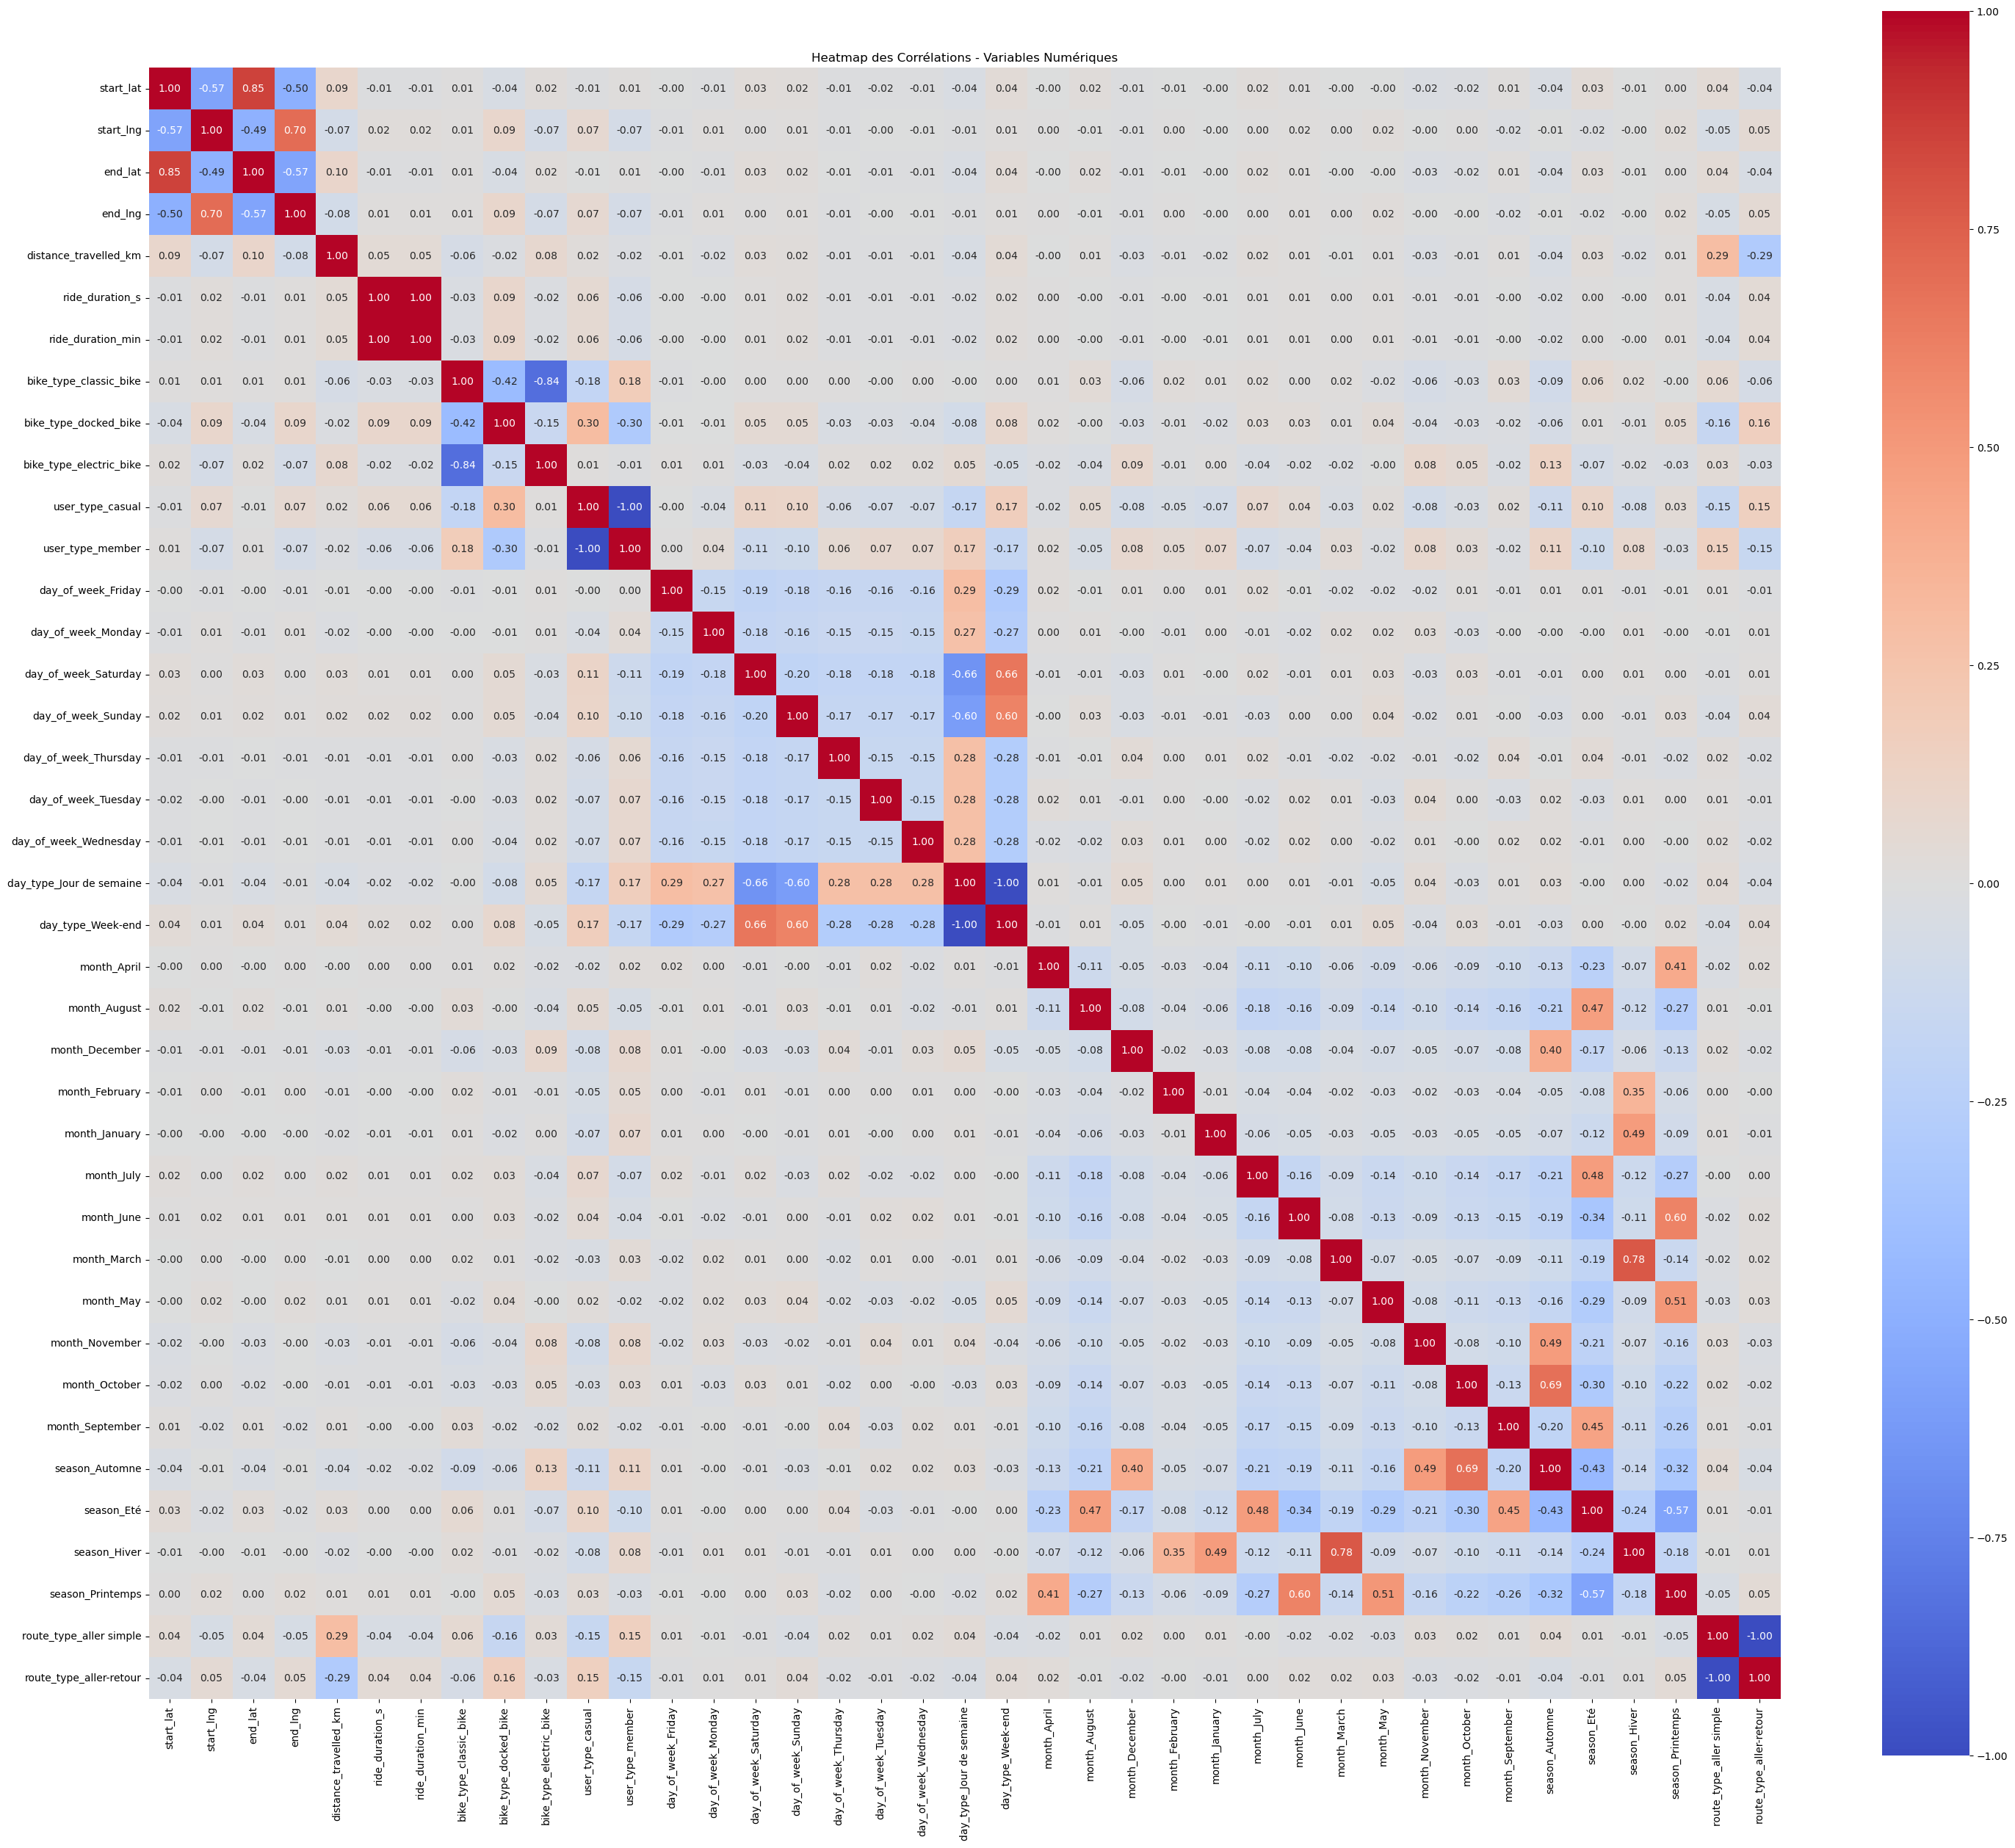

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = DF_dummies[col_num].corr()

plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': 0.8})
plt.title("Heatmap des Corrélations - Variables Numériques")
plt.tight_layout()
plt.show()